In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def funcy(x, y, z):
    return np.array([x*np.sqrt(y), z])
def funcu(x, u, z, y):
    if(y == 0):
        y=0.0000001
    return np.array([0.5 * x * u / np.sqrt(y), z])

In [60]:
def runge_kutta_4(x_0, y_0, z_0, h, a, b):
    steps = int((b-a)/h)
    yks = np.array([], dtype = float)
    zks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, y_0)
    zks = np.append(yks, z_0)
    xks = np.append(xks, x_0)

    for n in range(steps):
        k_1 = h*funcy(xks[n], yks[n], zks[n])
        k_2 = h*funcy(xks[n]  + 0.5 * h, yks[n] + 0.5*k_1[1], zks[n] + 0.5*k_1[0])
        k_3 = h * funcy(xks[n] + 0.5 * h, yks[n] + 0.5 * k_2[1], zks[n] + 0.5 * k_2[0])
        k_4 = h * funcy(xks[n] + h, yks[n] + k_3[1], zks[n] + k_3[0])
        x_n = xks[n] + h
        y_n = yks[n] + (k_1[1] + 2*k_2[1] + 2*k_3[1] + k_4[1]) / 6
        z_n = zks[n] + (k_1[0] + 2*k_2[0] + 2*k_3[0] + k_4[0]) / 6

        zks = np.append(zks, z_n)
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return (xks, yks)

def runge_kutta_4_u(x_0, u_0, z_0, y, h, a, b):
    steps = int((b-a)/h)
    yks = np.array([], dtype = float)
    zks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, u_0)
    zks = np.append(yks, z_0)
    xks = np.append(xks, x_0)

    for n in range(steps):
        k_1 = h*funcu(xks[n], yks[n], zks[n], y[n])
        k_2 = h*funcu(xks[n]  + 0.5 * h, yks[n] + 0.5*k_1[1], zks[n] + 0.5*k_1[0], y[n])
        k_3 = h * funcu(xks[n] + 0.5 * h, yks[n] + 0.5 * k_2[1], zks[n] + 0.5 * k_2[0], y[n])
        k_4 = h * funcu(xks[n] + h, yks[n] + k_3[1], zks[n] + k_3[0], y[n])
        x_n = xks[n] + h
        y_n = yks[n] + (k_1[1] + 2*k_2[1] + 2*k_3[1] + k_4[1]) / 6
        z_n = zks[n] + (k_1[0] + 2*k_2[0] + 2*k_3[0] + k_4[0]) / 6
        zks = np.append(zks, z_n)
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return (xks, yks)

def shooting_method(a0, x0, y0, u0, a, b, h, yl):
    diff = 0
    y_total = np.array([], dtype = float)
    for i in range(6):
        y_sol = runge_kutta_4(x0, y0, a0, h, a, b)

        u_sol = runge_kutta_4_u(x0, u0, 1, y_sol[1], h, a, b)

        diff = y_sol[1][-1] - yl
        a0 = a0 - (diff)/u_sol[1][-1]
        y_total = y_sol[1]

    return a0, diff, y_total


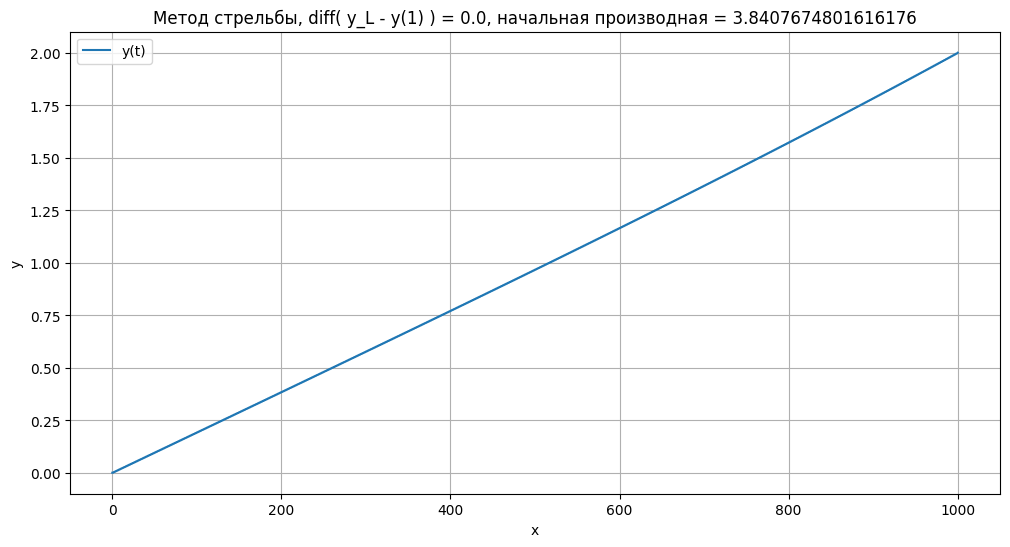

In [61]:

a0, diff, y_total = shooting_method(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.001, 2)

plt.figure(figsize=(12, 6))
plt.plot(y_total, label='y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод стрельбы, diff( y_L - y(1) ) = ' + str(diff) + ', начальная производная = ' + str(a0))
plt.legend()
plt.grid(True)
plt.show()


Сходимость достигнута на итерации 3


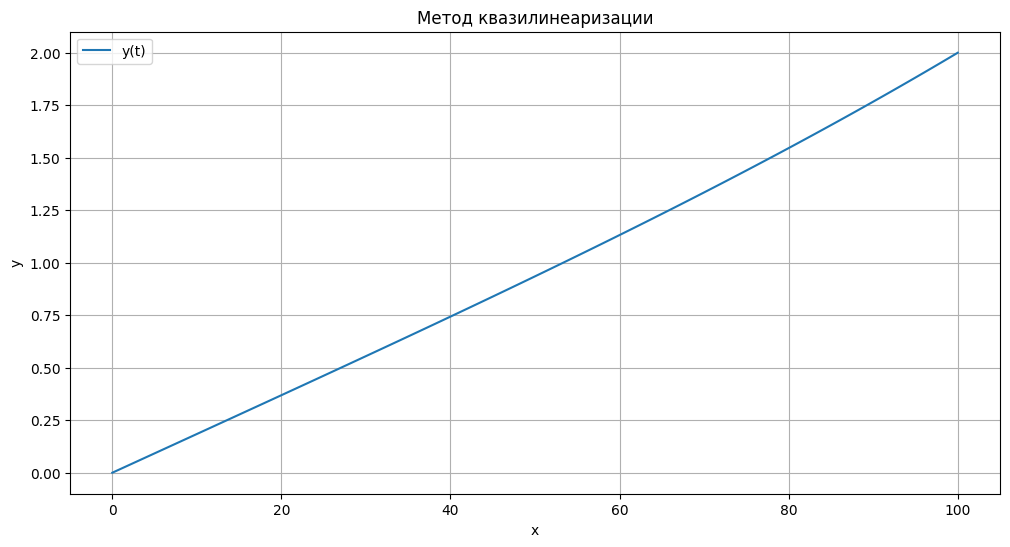

In [63]:
import math

def diag_algorithm(a, b, c, d):

    n = len(d)
    c_ = [0] * n
    d_ = [0] * n
    x = [0] * n


    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i-1] * c_[i-1]
        if i < n-1:
            c_[i] = c[i] / denom
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / denom


    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

def newton_quasilinearization(max_iter=100, tol=1e-6, h=0.01):
    """
    Реализация метода квазилинеаризации Ньютона
    """
    n = int(1/h) + 1
    x = [i*h for i in range(n)]


    y = [2*xi for xi in x]

    for iteration in range(max_iter):

        a = []
        b = []
        c = []
        d = []


        b.append(1)
        c.append(0)
        d.append(0)
        a.append(0)


        for i in range(1, n-1):
            xi = x[i]
            yi = y[i]

            if yi <= 0:

                coeff = 0
                rhs = 0
            else:
                coeff = xi / (2 * math.sqrt(yi))
                rhs = xi * math.sqrt(yi) - coeff * yi

            a_i = 1/h**2
            b_i = -2/h**2 - coeff
            c_i = 1/h**2
            d_i = rhs

            a.append(a_i)
            b.append(b_i)
            c.append(c_i)
            d.append(d_i)


        a.append(0)
        b.append(1)
        c.append(0)
        d.append(2)


        y_new = diag_algorithm(a[1:], b, c[:-1], d)


        max_diff = max(abs(y_new[i] - y[i]) for i in range(n))
        if max_diff < tol:

            break

        y = y_new
    else:
        print("OVERLOAD")

    return x, y


x, y = newton_quasilinearization()

plt.figure(figsize=(12, 6))
plt.plot(y, label='y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод квазилинеаризации')
plt.legend()
plt.grid(True)
plt.show()

